# WAVES Summer School 2025 (Gandia)

## Lienar Acoustics in the time-harmonic setting: Pressure formulation

This notebook illustrates the numerical solution of the wave equation for harmonic excitation using the so called [Finite Element Method](https://en.wikipedia.org/wiki/Finite_element_method) (FEM). The method aims at an approximate solution by subdividing the area of interest into smaller parts with simpler geometry, linking these parts together and applying methods from the calculus of variations to solve the problem numerically. The FEM is a well established method for the numerical approximation of the solution of partial differential equations (PDEs). The solutions of PDEs are often known analytically only for rather simple geometries. FEM based simulations allow to gain insights into other more complex cases.

## Problem Statement

The inhomogeneous linear [wave equation](https://en.wikipedia.org/wiki/Wave_equation) is given as

\begin{equation}
\Delta p(\mathbf{x}, t) - \frac{1}{c^2} \frac{\partial^2}{\partial t^2} p(\mathbf{x}, t) = - q(\mathbf{x}, t) ,
\end{equation}

where $p(\mathbf{x}, t)$ denotes the sound pressure at position $\mathbf{x}$, $c$ the speed of sound and $q(\mathbf{x}, t)$ the inhomogeneity.
For an harmonic excitation $q(\mathbf{x}, t) = \Re \{ Q(\mathbf{x}, \omega) \mathrm{e}^{\mathrm{j} \omega t} \}$ with frequency $\omega = 2 \pi f$ we choose the Ansatz $p(\mathbf{x}, t) = \Re \{ P(\mathbf{x}, \omega) \mathrm{e}^{\mathrm{j} \omega t} \}$ for the sound pressure.
Introduction of the complex quantities into the wave equation yields

\begin{equation}
\Delta P(\mathbf{x}, \omega) \mathrm{e}^{\mathrm{j} \omega t} + \frac{\omega^2}{c^2} P(\mathbf{x}, \omega) \mathrm{e}^{\mathrm{j} \omega t} = - Q(\mathbf{x}, \omega) \mathrm{e}^{\mathrm{j} \omega t} ,
\end{equation}

and canceling out the $\mathrm{e}^{\mathrm{j} \omega t}$ terms yields the [Helmholtz equation](https://en.wikipedia.org/wiki/Helmholtz_equation)

\begin{equation}
\Delta P(\mathbf{x}, \omega) + \frac{\omega^2}{c^2} P(\mathbf{x}, \omega) = - Q(\mathbf{x}, \omega) .
\end{equation}

We aim for a numerical solution of the Helmholtz equation on the domain $V$ with respect to the homogeneous Dirichlet boundary condition

\begin{equation}
P(\mathbf{x}, \omega) = P_{D} \qquad \text{for } x \in \partial V 
\end{equation}

where $P_{D}$ is the Dirichlet data.

## Variational Formulation

The FEM is based on expressing the partial differential equation (PDE) to be solved in its [variational](https://en.wikipedia.org/wiki/Calculus_of_variations) or weak form.
The first step towards this formulation is to multiply the Helmholtz equation by the test function $V(\mathbf{x}, \omega)$

\begin{equation}
\Delta P(\mathbf{x}, \omega) \cdot V(\mathbf{x}, \omega)  + \frac{\omega^2}{c^2} P(\mathbf{x}, \omega) \cdot V(\mathbf{x}, \omega) = - Q(\mathbf{x}, \omega) \cdot V(\mathbf{x}, \omega) ,
\end{equation}

followed by integration over the domain $V$

\begin{equation}
\int_V \Delta P(\mathbf{x}, \omega) \cdot V(\mathbf{x}, \omega) \mathrm{d}x  + \frac{\omega^2}{c^2} \int_V P(\mathbf{x}, \omega) \cdot V(\mathbf{x}, \omega) \mathrm{d}x = - \int_V Q(\mathbf{x}, \omega) \cdot V(\mathbf{x}, \omega) \mathrm{d}x ,
\end{equation}

where $\mathrm{d}x$ denotes a suitably chosen differential element for integration.
Application of [Green's first identity](https://en.wikipedia.org/wiki/Green%27s_identities) yields

\begin{equation}
{-} \int_V \nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x  + \int_{\partial V} V(\mathbf{x}, \omega) \frac{\partial}{\partial n}  P(\mathbf{x}, \omega) \mathrm{d}s + \frac{\omega^2}{c^2} \int_V P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x = - \int_V Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x .
\end{equation}

This way the differential order of the first integral is lowered which is advisable for application of the FEM.
The second integral vanishes as 

* the variation formulation requires $V(\mathbf{x}, \omega) = 0$ on $\partial V$ where $P(\mathbf{x}, \omega)$ is known - here by the pure Dirichlet boundary condition 

This results in the variational/weak formulation of the Helmholtz equation

\begin{equation}
{-} \int_V \nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x  + \frac{\omega^2}{c^2} \int_V P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x = - \int_V Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x .
\end{equation}

It is common to express the integral equation above in terms of the bilinear $a(P, V)$ and linear $L(V)$ forms 

\begin{equation}
a(P, V) = \frac{\omega^2}{c^2} \int_V P(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x - \int_V \nabla P(\mathbf{x}, \omega) \cdot \nabla V(\mathbf{x}, \omega) \mathrm{d}x ,
\end{equation}

\begin{equation}
L(V) = - \int_V Q(\mathbf{x}, \omega) V(\mathbf{x}, \omega) \mathrm{d}x ,
\end{equation}

where

\begin{equation}
a(P, V) = L(V) .
\end{equation}

## Numerical Solution

The numerical solution of the variational problem is based on [FEniCS](https://fenicsproject.org/), an open-source framework for numerical solution of PDEs.
Its high-level Python interface `dolfin` is used in the following to define the problem and compute its solution.
The implementation is based on the variational formulation derived above.
It is common in the FEM to denote the solution of the problem by $u$ and the test function by $v$.
The definition of the problem in FEniCS is very close to the mathematical formulation of the problem.
We limit ourselves to real-valued $P(\mathbf{x}, \omega)$ due to the assumption of Dirichlet real data.

A function is defined for this purpose, accompanied by a plotting routine for the resulting sound field.

In [11]:
# Libraries 
import time
import numpy as np
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.occ import *

# Geometry
R_int = 1.0
R_ext = 2.0

# Primary geometric objects
square= Rectangle(R_ext, R_ext).Face()
circ_int = Circle((0,0), R_int).Face()
circ_ext = Circle((0,0), R_ext).Face()

# Domain: A quarter of an annular domain
domain = square * (circ_ext - circ_int) 

# Boundary tags
tol=1e-6
domain.faces.name = "fluid"
domain.edges.name = "exterior"
domain.edges.col = (1, 0, 0) # red
domain.edges.Min(Y).name = "horizontal"
domain.edges.Min(Y).col = (1, 0, 1) # magenta
domain.edges.Min(X).name = "vertical"
domain.edges.Min(X).col = (0, 1, 1) # cyan
domain.edges[sqrt(X*X+Y*Y)<R_int+tol].name = "interior"
domain.edges[sqrt(X*X+Y*Y)<R_int+tol].col = (1, 1, 0) # yellow
domain.mat("fluid")

# wp = WorkPlane()
# wp.MoveTo(R_int,0).Line(R_ext-R_int).Rotate(135).Line(np.sqrt(2)*R_ext).Rotate(135).Line(R_ext-R_int).Rotate(45).Line(np.sqrt(2)*R_int)
# domain = wp.Face()

# # Boundary tags
# tol=1e-6
# domain.faces.name = "fluid"
# domain.edges.name = "exterior"
# domain.edges.col = (1, 0, 0) # red
# domain.edges.Min(Y).name = "horizontal"
# domain.edges.Min(Y).col = (1, 0, 1) # magenta
# domain.edges.Min(X).name = "vertical"
# domain.edges.Min(X).col = (0, 1, 1) # cyan
# domain.edges[X+Y<R_int+tol].name = "interior"
# domain.edges[X+Y<R_int+tol].col = (1, 1, 0) # yellow
# domain.mat("fluid")

## Each edge is colored
Draw(domain, height="3vh")

WebGuiWidget(layout=Layout(height='3vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3,…

BaseWebGuiScene

In [12]:

# Define the mesh
h_size = 0.3
mesh = Mesh(OCCGeometry(domain, dim=2).GenerateMesh(maxh=h_size))
mesh.Curve(2)
Draw(mesh, height="3vh")

WebGuiWidget(layout=Layout(height='3vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.250…

BaseWebGuiScene

Exact solution and boundary data for getting a solution in closed form

In [13]:
from ngsolve_special_functions import hankel1

# Physical parameters
f = 250 # Frequency in Hz
rho = 1.0 # Density in kg/m^3
c = 343.0 # Speed of sound in m/s

# Pressure on the interior boundary
omega = 2*np.pi*f
pex = hankel1(z=omega/c*sqrt(x**2+y**2), v=0) # pressure
e_r = CF((x,y))/sqrt(x**2+y**2) # radial unit vector
vex = 1.0/rho/(1j*omega)*(-omega/c)*hankel1(z=omega/c*sqrt(x**2+y**2), v=1)*e_r # radial velocity

# Plot the exact solution
Draw(pex, mesh, height="3vh", animate_complex=True)

# Boundary data for the pressure in the interior boundary
p_bnd = pex  # CF(pex(mesh(R_int, 0.)))

# Boundary data for the displacement in the interior boundary
v_bnd = vex  # CF(uex(mesh(R_int, 0.)))

# Radial surface admittance data on the exterior boundary
Z_bnd = pex/(vex*e_r) # CF(pex(mesh(R_ext, 0.)))/CF(vex(mesh(R_ext, 0.))[0])

WebGuiWidget(layout=Layout(height='3vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'spe…

### Finite element computation using a pressure formulation using Lagrange elements

In [14]:
# Compute the Finite Element approximation
def FEM_mixed(mesh, order_FE, f, rho, c, p_bnd, v_bnd, Z_bnd):

    # Angular frequency
    omega= 2*np.pi*f

    # Lagrange finite elements with complex values for the pressure field
    Q = L2(mesh, order=order_FE-1, complex=True)

    # Raviart-Thomas finite element with complex values for the velocity field
    V = HDiv(mesh, order=order_FE, RT=True, complex=True, dirichlet = "horizontal|vertical")

    # Mixed finite element space
    W = Q * V

    # Trial and test functions
    (p, v), (q, w) = W.TnT()

    # Normal vector outward to the boundary
    normal = specialcf.normal(mesh.dim)

    # Define the differential on the integration on the volumes
    dF = dx(mesh.Materials("fluid")) # fluid domain

    # Define the differential on the integration on the boundary
    dI = ds(mesh.Boundaries("interior")) # interior boundary
    dE = ds(mesh.Boundaries("exterior")) # exterior boundary

    # Variational formulation: Bilinear form
    a_bilinear = BilinearForm(W, symmetric=False)

    # Contribution in the air for motion equation and the impedance boundary
    a_bilinear += -1j*omega*rho*v*w*dF - p*div(w)*dF + Z_bnd*v.Trace()*w.Trace()*dE

    # Contribution in the fluid for the compressibility equation
    a_bilinear += -1j*omega/(rho*c**2)*p*q*dF + div(v)*q*dF

    # Forma lineal
    f_linear = LinearForm(W)

    # Contribution of the pressure on the computational domain
    f_linear += p_bnd*(w.Trace()*normal)*dI

    # Assembly the FEM matrices and the right-hand side
    a_bilinear.Assemble()
    f_linear.Assemble()

    # Allocate the solution vector with the prescribed Dirichlet boundary conditions
    gfpv = GridFunction(W)
    gfpv.components[1].Set(v_bnd, definedon=mesh.Boundaries("horizontal|vertical")) # Dirichlet condition for the normal velocity

    # Solve the linear system
    precond = Preconditioner(a_bilinear,"direct") # sparse direct solver (UMFPACK)
    solvers.BVP(bf=a_bilinear, lf=f_linear, gf=gfpv, pre=precond, print=False)

    return gfpv, W

Function to compute the RMS errors and the errors associated with the acoustic energy of the system

In [15]:
# Compute the root-mean square (RMS) relative error
def compute_error(gfpv, pex, vex, W):

    # Get the components of the mixed finite element space
    Q, V = W.components

    # Get the interpolated exact pressure solution on the mesh
    gfp_ex = GridFunction(Q)
    gfp_ex.Set(pex)

    # Get the interpolated exact velocity solution on the mesh
    gfv_ex = GridFunction(V)
    gfv_ex.Set(vex)

    # Get the computed pressure and velocity solutions
    gfp, gfv = gfpv.components

    # RMS of the exact solution
    RMS_p_ex = sqrt(Integrate(1./(rho*c**2)*InnerProduct(gfp_ex, gfp_ex), Q.mesh, order=2*Q.globalorder))

    # RMS absolute error between the exact and the Finite Element approximation
    error_RMS_p = sqrt(Integrate(1./(rho*c**2)*InnerProduct(gfp-gfp_ex, gfp-gfp_ex), Q.mesh, order=2*Q.globalorder))

    # RMS of the exact solution
    RMS_v_ex = sqrt(Integrate(rho*InnerProduct(gfv_ex, gfv_ex), V.mesh, order=2*V.globalorder))

    # RMS absolute error between the exact and the Finite Element approximation
    error_RMS_v = sqrt(Integrate(rho*InnerProduct(gfv-gfv_ex, gfv-gfv_ex), V.mesh, order=2*V.globalorder))

    # Energy associated to the exact solution
    energy_ex = sqrt(RMS_p_ex**2 + RMS_v_ex**2)

    # Energy error
    error_energy = sqrt(error_RMS_p**2 + error_RMS_v**2)

    return error_RMS_p.real/RMS_p_ex.real, error_RMS_v.real/RMS_v_ex.real, error_energy.real/energy_ex.real

### Study of convergence

Let's check the order of convergence of this finite element discretization computing the error for sucesive refinements of the mesh

In [16]:
# Finite element order
order_FE = np.arange(1, 5)  # Orders from 1 to 4
h_size = np.array([0.4, 0.2, 0.1, 0.05, 0.025])  # Mesh sizes

# Compute the Finite Element approximation and the error for different mesh sizes and orders
error_RMS_p = np.zeros((len(h_size), len(order_FE)))
error_RMS_v = np.zeros((len(h_size), len(order_FE)))
error_energy = np.zeros((len(h_size), len(order_FE)))
wall_time = np.zeros((len(h_size), len(order_FE)))

# Loop over mesh sizes and finite element orders
for i, hs in enumerate(h_size):
    mesh = Mesh(OCCGeometry(domain, dim=2).GenerateMesh(maxh=hs))
    for j, order in enumerate(order_FE):
        mesh.Curve(int(order))
        start_wall = time.time()
        gfpv, W = FEM_mixed(mesh, int(order), f, rho, c, p_bnd, v_bnd, Z_bnd)
        wall_time[i, j] = time.time() - start_wall
        error_RMS_p[i, j], error_RMS_v[i, j], error_energy[i, j] = compute_error(gfpv, pex, vex, W)
        # Print the errors
        print(f"Order {order}, Mesh size {hs}: RMS Error (Pressure) = {error_RMS_p[i, j]:.4e}, RMS Error (Velocity) = {error_RMS_v[i, j]:.4e}, Energy Error = {error_energy[i, j]:.4e}")

# Plot last pressure field computed
gfp, gfv = gfpv.components
# Plot the computed pressure field
Draw(gfp, mesh, height="3vh", animate_complex=True)
# Plot the computed velocity field
Draw(gfv[0], mesh, height="3vh", animate_complex=True)

Order 1, Mesh size 0.4: RMS Error (Pressure) = 7.9696e-01, RMS Error (Velocity) = 1.6166e+00, Energy Error = 1.2813e+00
Order 2, Mesh size 0.4: RMS Error (Pressure) = 1.9693e-01, RMS Error (Velocity) = 2.9308e-01, Energy Error = 2.4997e-01
Order 3, Mesh size 0.4: RMS Error (Pressure) = 1.1499e-02, RMS Error (Velocity) = 5.3544e-02, Energy Error = 3.8825e-02
Order 4, Mesh size 0.4: RMS Error (Pressure) = 8.9260e-04, RMS Error (Velocity) = 7.2914e-03, Energy Error = 5.2088e-03
Order 1, Mesh size 0.2: RMS Error (Pressure) = 8.7288e-01, RMS Error (Velocity) = 1.7718e+00, Energy Error = 1.4013e+00
Order 2, Mesh size 0.2: RMS Error (Pressure) = 7.8075e-02, RMS Error (Velocity) = 1.6552e-01, Energy Error = 1.2965e-01
Order 3, Mesh size 0.2: RMS Error (Pressure) = 1.8359e-03, RMS Error (Velocity) = 1.7321e-02, Energy Error = 1.2351e-02
Order 4, Mesh size 0.2: RMS Error (Pressure) = 8.4230e-05, RMS Error (Velocity) = 1.3106e-03, Energy Error = 9.3134e-04
Order 1, Mesh size 0.1: RMS Error (Press

WebGuiWidget(layout=Layout(height='3vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'spe…

WebGuiWidget(layout=Layout(height='3vh', width='100%'), value={'gui_settings': {'Complex': {'phase': 0.0, 'spe…

BaseWebGuiScene

Compute the order of convergence of the FEM discretizations

In [17]:
# Get order of convergence for each order_FE
for j, order in enumerate(order_FE):
    mRMS_p, _ = np.polyfit(np.log(h_size[1:]), np.log(error_RMS_p[1:, j]), 1)
    mRMS_v, _ = np.polyfit(np.log(h_size[1:]), np.log(error_RMS_v[1:, j]), 1)
    print(f"Order {order}: RMS Error convergence rate (pressure) = {mRMS_p:.1f}, RMS Error convergence rate (velocity) = {mRMS_v:.1f}")
    mEnergy, _ = np.polyfit(np.log(h_size[1:]), np.log(error_energy[1:, j]), 1)
    print(f"Order {order}: Energy Error convergence rate = {mEnergy:.1f}")

Order 1: RMS Error convergence rate (pressure) = 0.0, RMS Error convergence rate (velocity) = 0.0
Order 1: Energy Error convergence rate = 0.0
Order 2: RMS Error convergence rate (pressure) = 2.0, RMS Error convergence rate (velocity) = 1.1
Order 2: Energy Error convergence rate = 1.1
Order 3: RMS Error convergence rate (pressure) = 3.2, RMS Error convergence rate (velocity) = 2.1
Order 3: Energy Error convergence rate = 2.1
Order 4: RMS Error convergence rate (pressure) = 4.2, RMS Error convergence rate (velocity) = 3.1
Order 4: Energy Error convergence rate = 3.1


Check the numerical errors and observe the FEM convergence

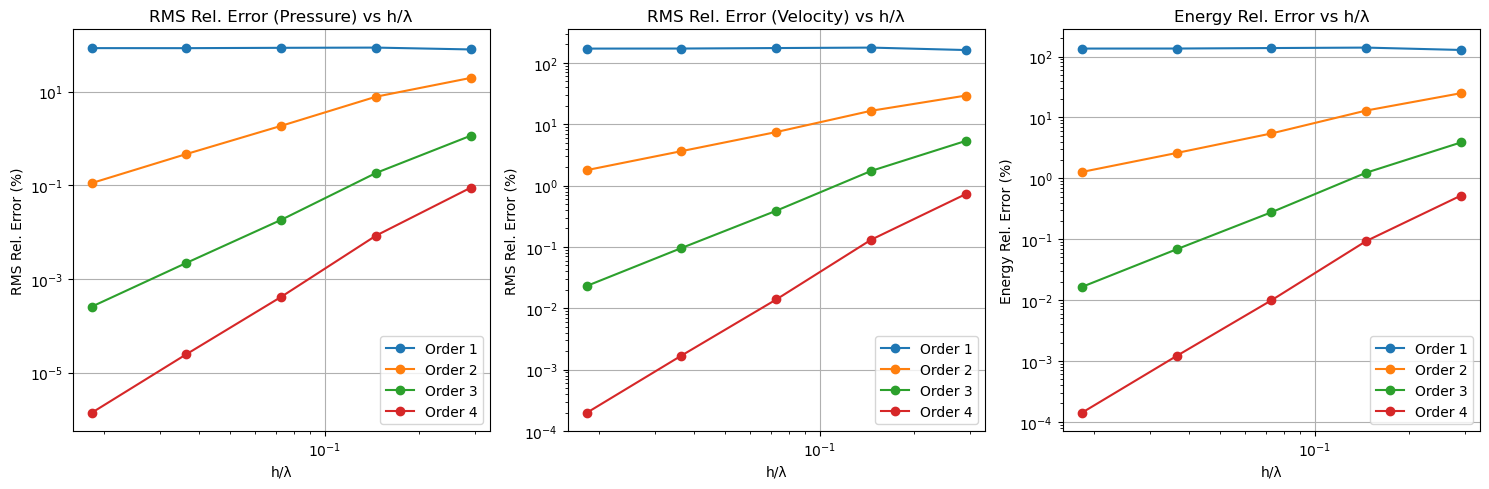

In [18]:
# Plot the convergence results with tag the order in the legend
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.loglog(h_size*f/c, 100*error_RMS_p, marker='o', label=[f"Order {order}" for order in order_FE])
plt.xlabel('h/λ')
plt.ylabel('RMS Rel. Error (%)')
plt.title('RMS Rel. Error (Pressure) vs h/λ')
plt.grid(True)
plt.legend()
plt.subplot(1, 3, 2)
plt.loglog(h_size*f/c, 100*error_RMS_v, marker='o', label=[f"Order {order}" for order in order_FE])
plt.xlabel('h/λ')
plt.ylabel('RMS Rel. Error (%)')
plt.title('RMS Rel. Error (Velocity) vs h/λ')
plt.grid(True)
plt.legend()
plt.subplot(1, 3, 3)
plt.loglog(h_size*f/c, 100*error_energy, marker='o', label=[f"Order {order}" for order in order_FE])
plt.xlabel('h/λ')
plt.ylabel('Energy Rel. Error (%)')
plt.title('Energy Rel. Error vs h/λ')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Checking the optimal strategy: refine the mesh or increasing the FE order?

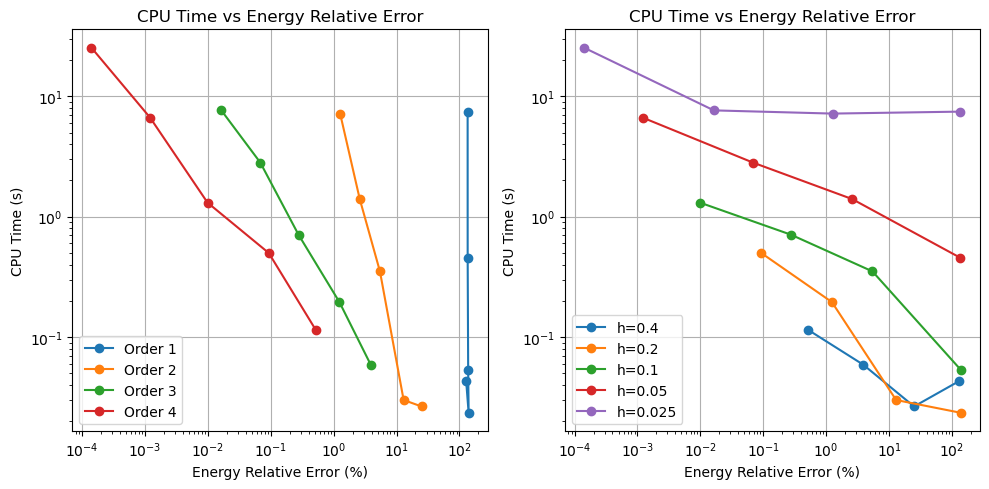

In [19]:
# Plot the CPU and wall time vs energy relative error with tag the order in the legend
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.loglog(100*error_energy, wall_time, marker='o', label=[f"Order {order}" for order in order_FE])
plt.xlabel('Energy Relative Error (%)')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time vs Energy Relative Error')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.loglog(100*error_energy.T, wall_time.T, marker='o', label=[f"h={hs}" for hs in h_size])
plt.xlabel('Energy Relative Error (%)')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time vs Energy Relative Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Write to a csv file the wall time and the RMS and energy errors

In [20]:
# Write to a CSV file the errors computed with the RMS and energy norms
import pandas as pd
# Create a DataFrame with the errors and wall time
df_errors = pd.DataFrame({
    'Mesh Size (h)': np.tile(h_size, len(order_FE)),
    'Order': np.repeat(order_FE, len(h_size)),
    'RMS Error pressure': error_RMS_p.flatten(),
    'RMS Error velocity': error_RMS_v.flatten(),
    'Energy Error': error_energy.flatten(),
    'Wall Time (s)': wall_time.flatten()
})
# Save the DataFrame to a CSV file
df_errors.to_csv('L2-pressure-HDiv-velocity.csv', index=False)


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).